# COVID 19 Data Exploration

## __Task 1__
Analyse how countries differ in their mobility trends. Use the `catplot` function to visualise mobility trends across the six mobility categories for a set of five countries of your choice. Provide a brief interpretation of the results focusing on differences between countries and on mobility categories that differentiate (or not) the countries you selected.   

_Level of analysis:_ country

_Variables:_ all six mobility categories

_Descriptive statistics:_ median (no need to compute this separately, you will get it from the boxplot)

_Plotting:_ boxplots via the `catplot` function in `seaborn`


<img src="https://www.google.com/covid19/static/reports-icon-grid.png" title='Google Covid-19 Community Mobility Data' width="200" height="100" align="right"/>


## **Load the [Google Mobility Trends Report](https://www.google.com/covid19/mobility)**

In [2]:
import pandas as pd
mobility_trends = pd.read_csv('https://www.gstatic.com/covid19/mobility/Global_Mobility_Report.csv', parse_dates = ['date']) 
mobility_trends.shape

C:\Users\alamo\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (3,4,5) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


(8848478, 15)

In [3]:
# From wide to long format using the function melt in pandas
mobility_trends_long = pd.melt(mobility_trends, 
                               id_vars = mobility_trends.columns[[1,8]],
                               value_vars = mobility_trends.columns[9:]).dropna() #Here we drop NA values to make more representable the sample
mobility_trends_long.shape

(33194698, 4)

In [4]:
#Select 5 countries
mobility_trends_Brazil_long = mobility_trends_long[mobility_trends_long["country_region"] == "Brazil"]
mobility_trends_Venezuela_long = mobility_trends_long[mobility_trends_long["country_region"] == "Venezuela"]
mobility_trends_Peru_long = mobility_trends_long[mobility_trends_long["country_region"] == "Peru"]
mobility_trends_Colombia_long = mobility_trends_long[mobility_trends_long["country_region"] == "Colombia"]
mobility_trends_Argentina_long = mobility_trends_long[mobility_trends_long["country_region"] == "Argentina"]

In [5]:
#Combine the 5 countries in to one list "Latinamerican Countries"
mobility_trends_Latin_log = pd.concat([mobility_trends_Brazil_long, mobility_trends_Venezuela_long, mobility_trends_Colombia_long, mobility_trends_Argentina_long, mobility_trends_Peru_long], 
                      keys=["Brazil", "Venezuela", "Colombia","Argentina","Peru"]).reset_index()
mobility_trends_Latin_log

,level_0,level_1,country_region,date,variable,value
0,Brazil,750799,Brazil,2020-02-15,retail_and_recreation_percent_change_from_base...,5.0
1,Brazil,750800,Brazil,2020-02-16,retail_and_recreation_percent_change_from_base...,2.0
2,Brazil,750801,Brazil,2020-02-17,retail_and_recreation_percent_change_from_base...,-2.0
3,Brazil,750802,Brazil,2020-02-18,retail_and_recreation_percent_change_from_base...,-3.0
4,Brazil,750803,Brazil,2020-02-19,retail_and_recreation_percent_change_from_base...,-1.0
...,...,...,...,...,...,...
6525918,Peru,49564808,Peru,2022-02-14,residential_percent_change_from_baseline,2.0
6525919,Peru,49564809,Peru,2022-02-15,residential_percent_change_from_baseline,11.0
6525920,Peru,49564810,Peru,2022-02-16,residential_percent_change_from_baseline,6.0
6525921,Peru,49564811,Peru,2022-02-17,residential_percent_change_from_baseline,6.0


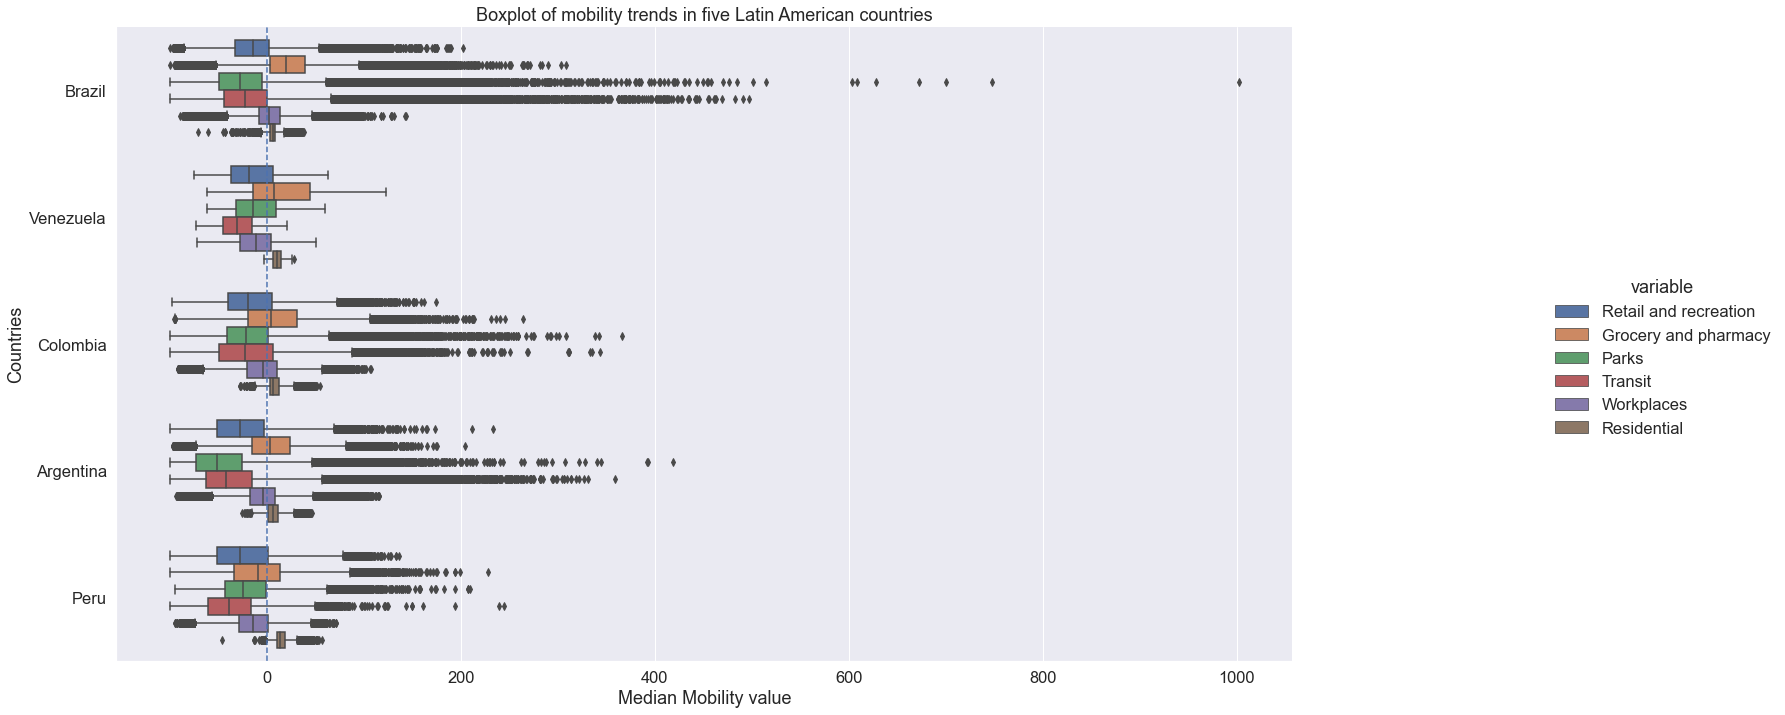

In [32]:
#Boxplot and comparison of mobility trends of 5 Latinamerican countries
import seaborn as sns
import matplotlib.pyplot as plt

#Labels for the legend
labels= ['Retail and recreation', "Grocery and pharmacy", "Parks", "Transit", "Workplaces", "Residential"]
#Seaborn visualisation using Boxplot
sns.set(font_scale = 1.5)
plot = sns.catplot(x="value",
                y="country_region",
            hue="variable",
            data = mobility_trends_Latin_log,
            kind="box",
            height=10, aspect=1.9).set(title ="Boxplot of mobility trends in five Latin American countries");
plot.set_axis_labels("Median Mobility value", "Countries")
for t, l in zip(plot._legend.texts, labels):
    t.set_text(l)
#Set a line at value "0"
plt.axvline(0, ls='--')
#Store the fig for later publish
plot.savefig("grouped_boxplot_Latin_mobility.png")

---

#### __Analysis_1__
This is an analysis of mobility trends during the COVID-19 pandemic in 5 Latinamerican countries. The mobility trends was categorized into 6 variabels `Retail and recreation`, `Grocery and pharmacy`, `Parks`, `Transit`, `Workplaces` and `Residential` which were compared in order to make inferences about the behaviour of each country. We need to take into consideration that for each countries the Covid-19 lockdown started in different time period for each country in fact by 3 April all countries in Latinamerica got one case of Covid-19 when already the virus was over Europe.

A comparison of the mobility trends leave so traces to interpretate the behaviour and response of each country:

1. _Retail and recreation:_ The 5 countries reduce their mobility from the baseline with `Argentina` as the country with less median mobility and `Brazil` with the highest median mobility.
2. _Grocery and recreatiion:_ Here we discover that all countries but `Peru` increase their median mobility from the baseline. In this case we see that `Brasil` have the highest median mobility of all countries.
3. _Parks:_ We can see that `Parks'` mobility fluctuates in the 5 Latinamerican countries. Although all countries have a reduce median mobility we can see that `Argentina` have the lowest median mobility and `Venezuela` with the highest median mobility. 
4. _Transit:_ Although the 5 countries reduce their transit mobility from the baseline.`Argentina` have the lowest mobility and `Brasil` have the highest mobility.
5. _Workplaces:_ `Brasil` seem to be the only country that increase slightly their median mobility in workplaces. However, we can see that in Peru there was a considerable reduction of the  mobility.
6. _Residential:_ For residential mobility we can see that `Peru` have the highest mobility and the other countries seen to mantain similar mobility very close to 0 or normal mobility.

In conclusion for the 5 Latinamerican countries we can see only slightly mobility differences and with a tendency to increasing their residential mobility and decrease their in the other values. However, is curious that for the 5 countries there was a reduction in `parks` mobility which could reflect a strict goverment restriction for the Covid-19  virus. Also, a normal activity of `workplace` mobility in the 5 countries apart from `Peru` which reduce their mobility considerably more.

---

## __Task 2__
Analyse the mobility changes in the United Kingdom during the second lockdown, 5 November - 2 December 2020. Perform the following analysis and visualisation: 
1. After selecting data about the UK, use the `catplot` function for ploting categorical variables in `seaborn` to plot workplaces mobility changes across all UK counties. In addition, plot the 99% confidence intervals (CI) using 10,000 bootstrap iterations. Briefly interpret the results and compare your results to the results about the first lockdown discussed in labs.
2. Compute the median mobility change across all UK counties and six mobility categories. Use the median values to fit a linear regression model between the variables `retail_recreation` and `workplaces`. Plot the relationship using the `regplot` function in `seaborn`. Briefly discuss your results.

_Level of analysis:_ UK county

_Variables:_ selected mobility categories and `workplaces` in particular

_Descriptive statistics:_ mean, median, and 99% CI

_Modelling:_ linear regression model

_Plotting:_ `catplot` and `regplot` in `seaborn`

In [8]:
# Data set of mobility trends of only UK.

mobility_trends_UK = mobility_trends[mobility_trends["country_region"] == "United Kingdom"]

# We move the dataset to long format
mobility_trends_UK_long = pd.melt(mobility_trends_UK, 
                                  id_vars =mobility_trends_UK.columns[[1,2,8]], 
                                  value_vars = mobility_trends_UK.columns[9:]).dropna() #Here we drop NA values to make more representable the sample
mobility_trends_UK_long

,country_region,sub_region_1,date,variable,value
735,United Kingdom,Aberdeen City,2020-02-15,retail_and_recreation_percent_change_from_base...,-3.0
736,United Kingdom,Aberdeen City,2020-02-16,retail_and_recreation_percent_change_from_base...,6.0
737,United Kingdom,Aberdeen City,2020-02-17,retail_and_recreation_percent_change_from_base...,11.0
738,United Kingdom,Aberdeen City,2020-02-18,retail_and_recreation_percent_change_from_base...,5.0
739,United Kingdom,Aberdeen City,2020-02-19,retail_and_recreation_percent_change_from_base...,2.0
...,...,...,...,...,...
1838419,United Kingdom,York,2022-02-14,residential_percent_change_from_baseline,9.0
1838420,United Kingdom,York,2022-02-15,residential_percent_change_from_baseline,8.0
1838421,United Kingdom,York,2022-02-16,residential_percent_change_from_baseline,10.0
1838422,United Kingdom,York,2022-02-17,residential_percent_change_from_baseline,8.0


In [9]:
# Here we select the values that are in between the dates of the second lockdown (5 November - 2 December 2020) in UK
lockdown2 = mobility_trends_UK_long[(mobility_trends_UK_long['date'] >= '2020-11-05') & (mobility_trends_UK_long['date'] <= '2020-12-02')]
lockdown2

,country_region,sub_region_1,date,variable,value
999,United Kingdom,Aberdeen City,2020-11-05,retail_and_recreation_percent_change_from_base...,-37.0
1000,United Kingdom,Aberdeen City,2020-11-06,retail_and_recreation_percent_change_from_base...,-38.0
1001,United Kingdom,Aberdeen City,2020-11-07,retail_and_recreation_percent_change_from_base...,-41.0
1002,United Kingdom,Aberdeen City,2020-11-08,retail_and_recreation_percent_change_from_base...,-37.0
1003,United Kingdom,Aberdeen City,2020-11-09,retail_and_recreation_percent_change_from_base...,-34.0
...,...,...,...,...,...
1837976,United Kingdom,York,2020-11-28,residential_percent_change_from_baseline,14.0
1837977,United Kingdom,York,2020-11-29,residential_percent_change_from_baseline,12.0
1837978,United Kingdom,York,2020-11-30,residential_percent_change_from_baseline,17.0
1837979,United Kingdom,York,2020-12-01,residential_percent_change_from_baseline,16.0


In [16]:
# Here we are going to combine counties and the mobility variables and later display the min, max, mean, median and standard deviation of their values.
import numpy as np

lockdown2_workplaces_stats = lockdown2.groupby(['sub_region_1','variable'])['value'].agg([min,max, np.mean, np.median, np.std]).reset_index() #We reset the index to make more readable our dataset.
lockdown2_workplaces_stats

,sub_region_1,variable,min,max,mean,median,std
0,Aberdeen City,grocery_and_pharmacy_percent_change_from_baseline,-15.0,1.0,-6.821429,-7.0,3.311636
1,Aberdeen City,parks_percent_change_from_baseline,-28.0,57.0,0.964286,-3.5,20.017552
2,Aberdeen City,residential_percent_change_from_baseline,6.0,16.0,12.250000,14.0,3.318020
3,Aberdeen City,retail_and_recreation_percent_change_from_base...,-42.0,-25.0,-35.571429,-36.0,3.676034
4,Aberdeen City,transit_stations_percent_change_from_baseline,-46.0,-37.0,-40.535714,-40.0,2.545616
...,...,...,...,...,...,...,...
871,York,parks_percent_change_from_baseline,-58.0,3.0,-26.142857,-23.5,16.116967
872,York,residential_percent_change_from_baseline,12.0,20.0,16.928571,18.0,2.522911
873,York,retail_and_recreation_percent_change_from_base...,-73.0,-29.0,-58.321429,-57.5,8.848744
874,York,transit_stations_percent_change_from_baseline,-75.0,-43.0,-63.321429,-62.5,6.170741


In [17]:
#Now we create a dataset that represent the workplace mobility of all counties and later sorted by the max value in a descending order.
lockdown2_workplaces_mean = lockdown2_workplaces_stats[lockdown2_workplaces_stats['variable'] == 'workplaces_percent_change_from_baseline'].sort_values(by='mean', ascending = False).reset_index()#We reset the index to make more readable our dataset.
lockdown2_workplaces_mean

,index,sub_region_1,variable,min,max,mean,median,std
0,498,Moray,workplaces_percent_change_from_baseline,-29.0,-3.0,-17.285714,-19.5,5.701573
1,74,Blaenau Gwent,workplaces_percent_change_from_baseline,-31.0,-5.0,-17.464286,-19.0,6.619176
2,241,Dumfries and Galloway,workplaces_percent_change_from_baseline,-22.0,-10.0,-17.964286,-19.0,3.120804
3,462,Mid Ulster,workplaces_percent_change_from_baseline,-22.0,-8.0,-18.535714,-19.5,3.605368
4,387,Isle of Anglesey,workplaces_percent_change_from_baseline,-36.0,-3.0,-19.392857,-22.0,8.504201
...,...,...,...,...,...,...,...,...
146,851,Windsor and Maidenhead,workplaces_percent_change_from_baseline,-50.0,-28.0,-43.928571,-48.5,7.644551
147,857,Wokingham,workplaces_percent_change_from_baseline,-52.0,-26.0,-44.071429,-49.0,9.591387
148,875,York,workplaces_percent_change_from_baseline,-49.0,-36.0,-44.821429,-46.5,3.641871
149,46,Bath and North East Somerset,workplaces_percent_change_from_baseline,-50.0,-35.0,-45.178571,-47.0,4.110092


In [18]:
# Data extract from class and adapted to compare with workplace variable in second lockdown.
first_lockdown_UK = mobility_trends_UK_long[(mobility_trends_UK_long['date'] >= '2020-03-24') & (mobility_trends_UK_long['date'] <= '2020-04-13')]
lockdown1_workplaces_stats = first_lockdown_UK.groupby(['sub_region_1','variable'])['value'].agg([min,max, np.mean, np.median, np.std]).reset_index() #We reset the index to make more readable our dataset.
lockdown1_workplaces_mean = lockdown1_workplaces_stats[lockdown1_workplaces_stats['variable'] == 'workplaces_percent_change_from_baseline'].sort_values(by='mean', ascending = False).reset_index()#We reset the index to make more readable our dataset.

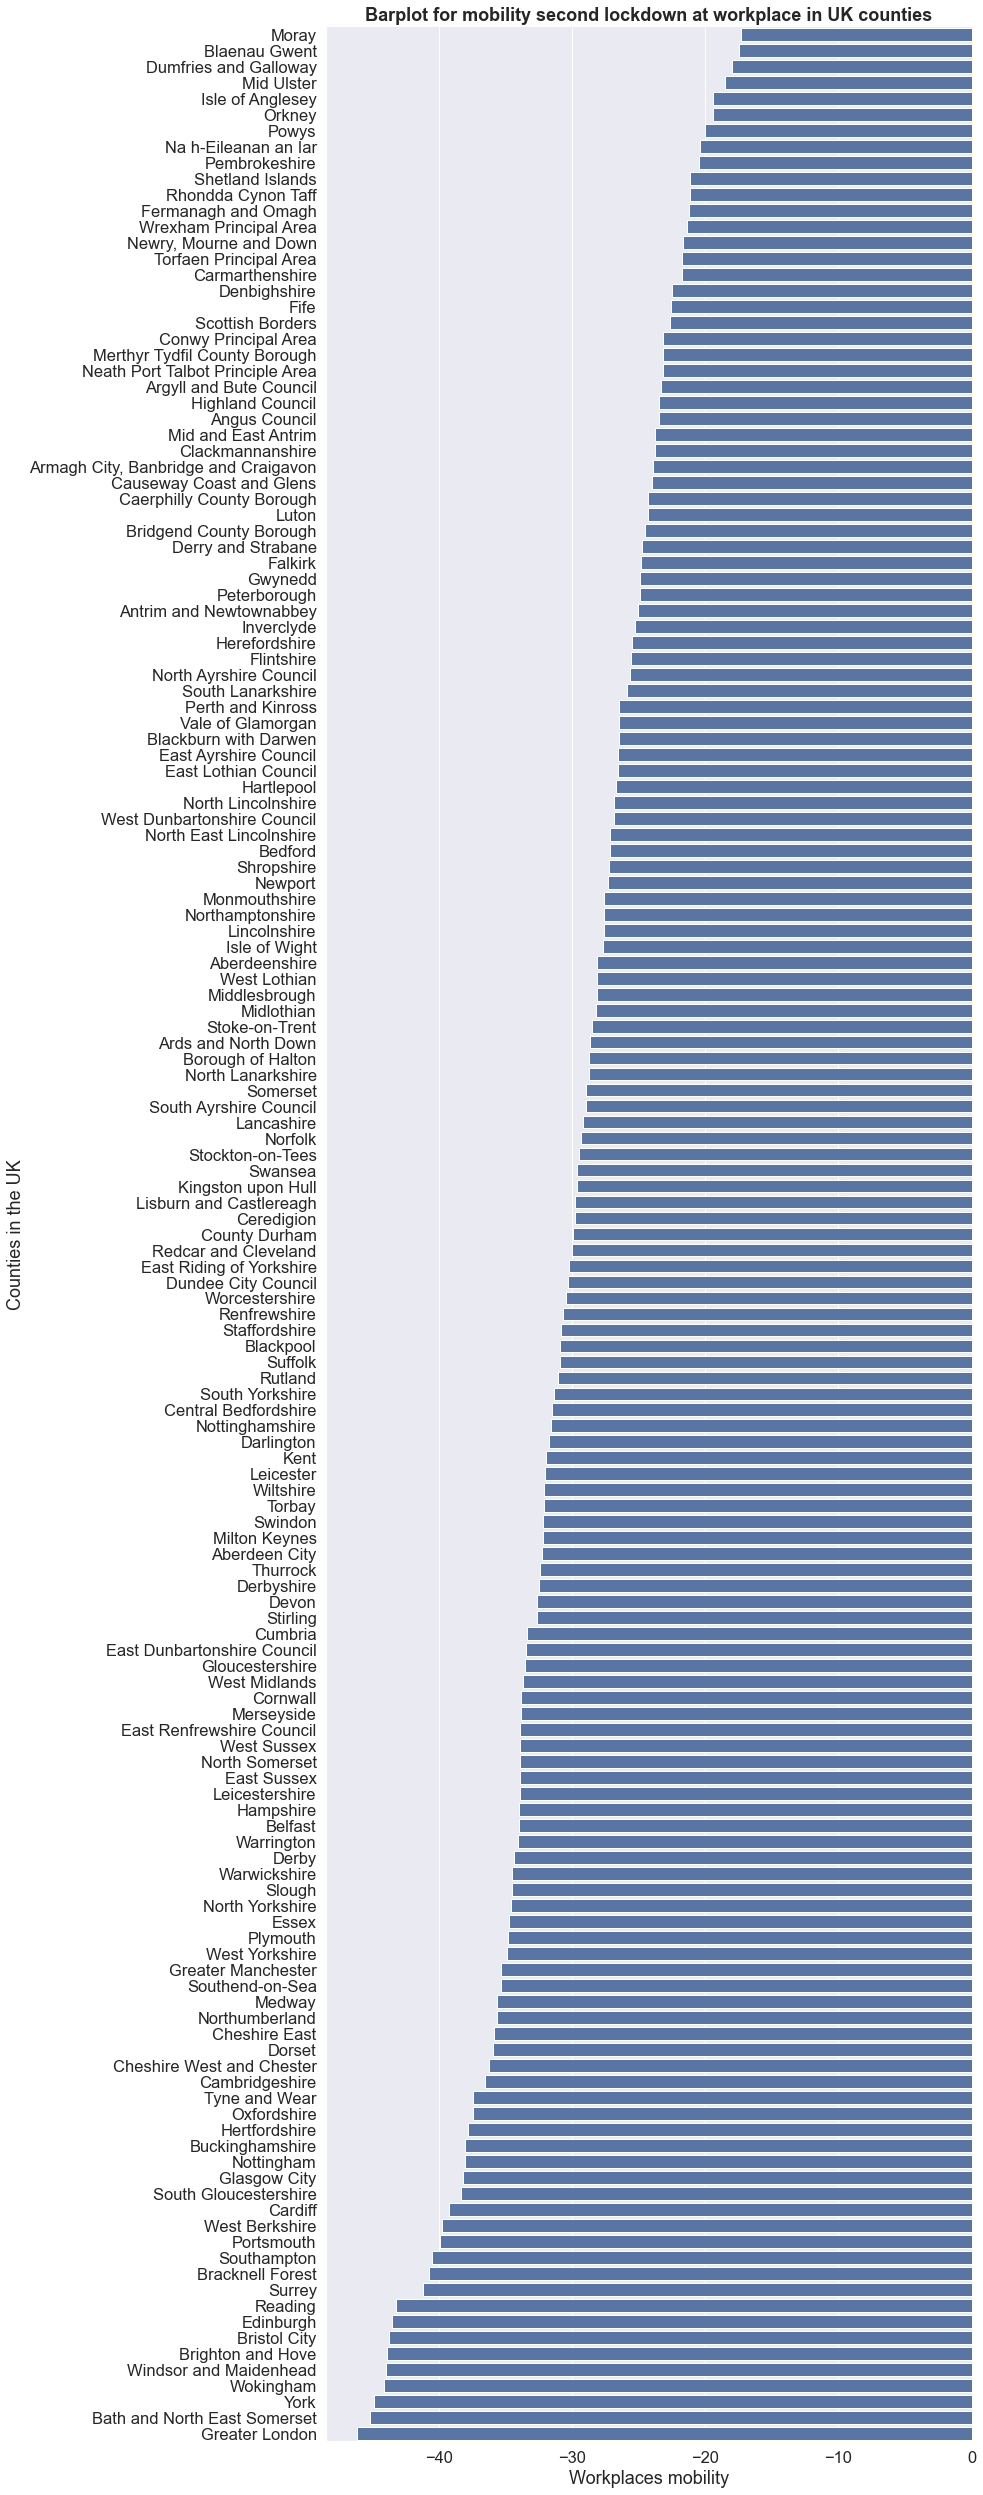

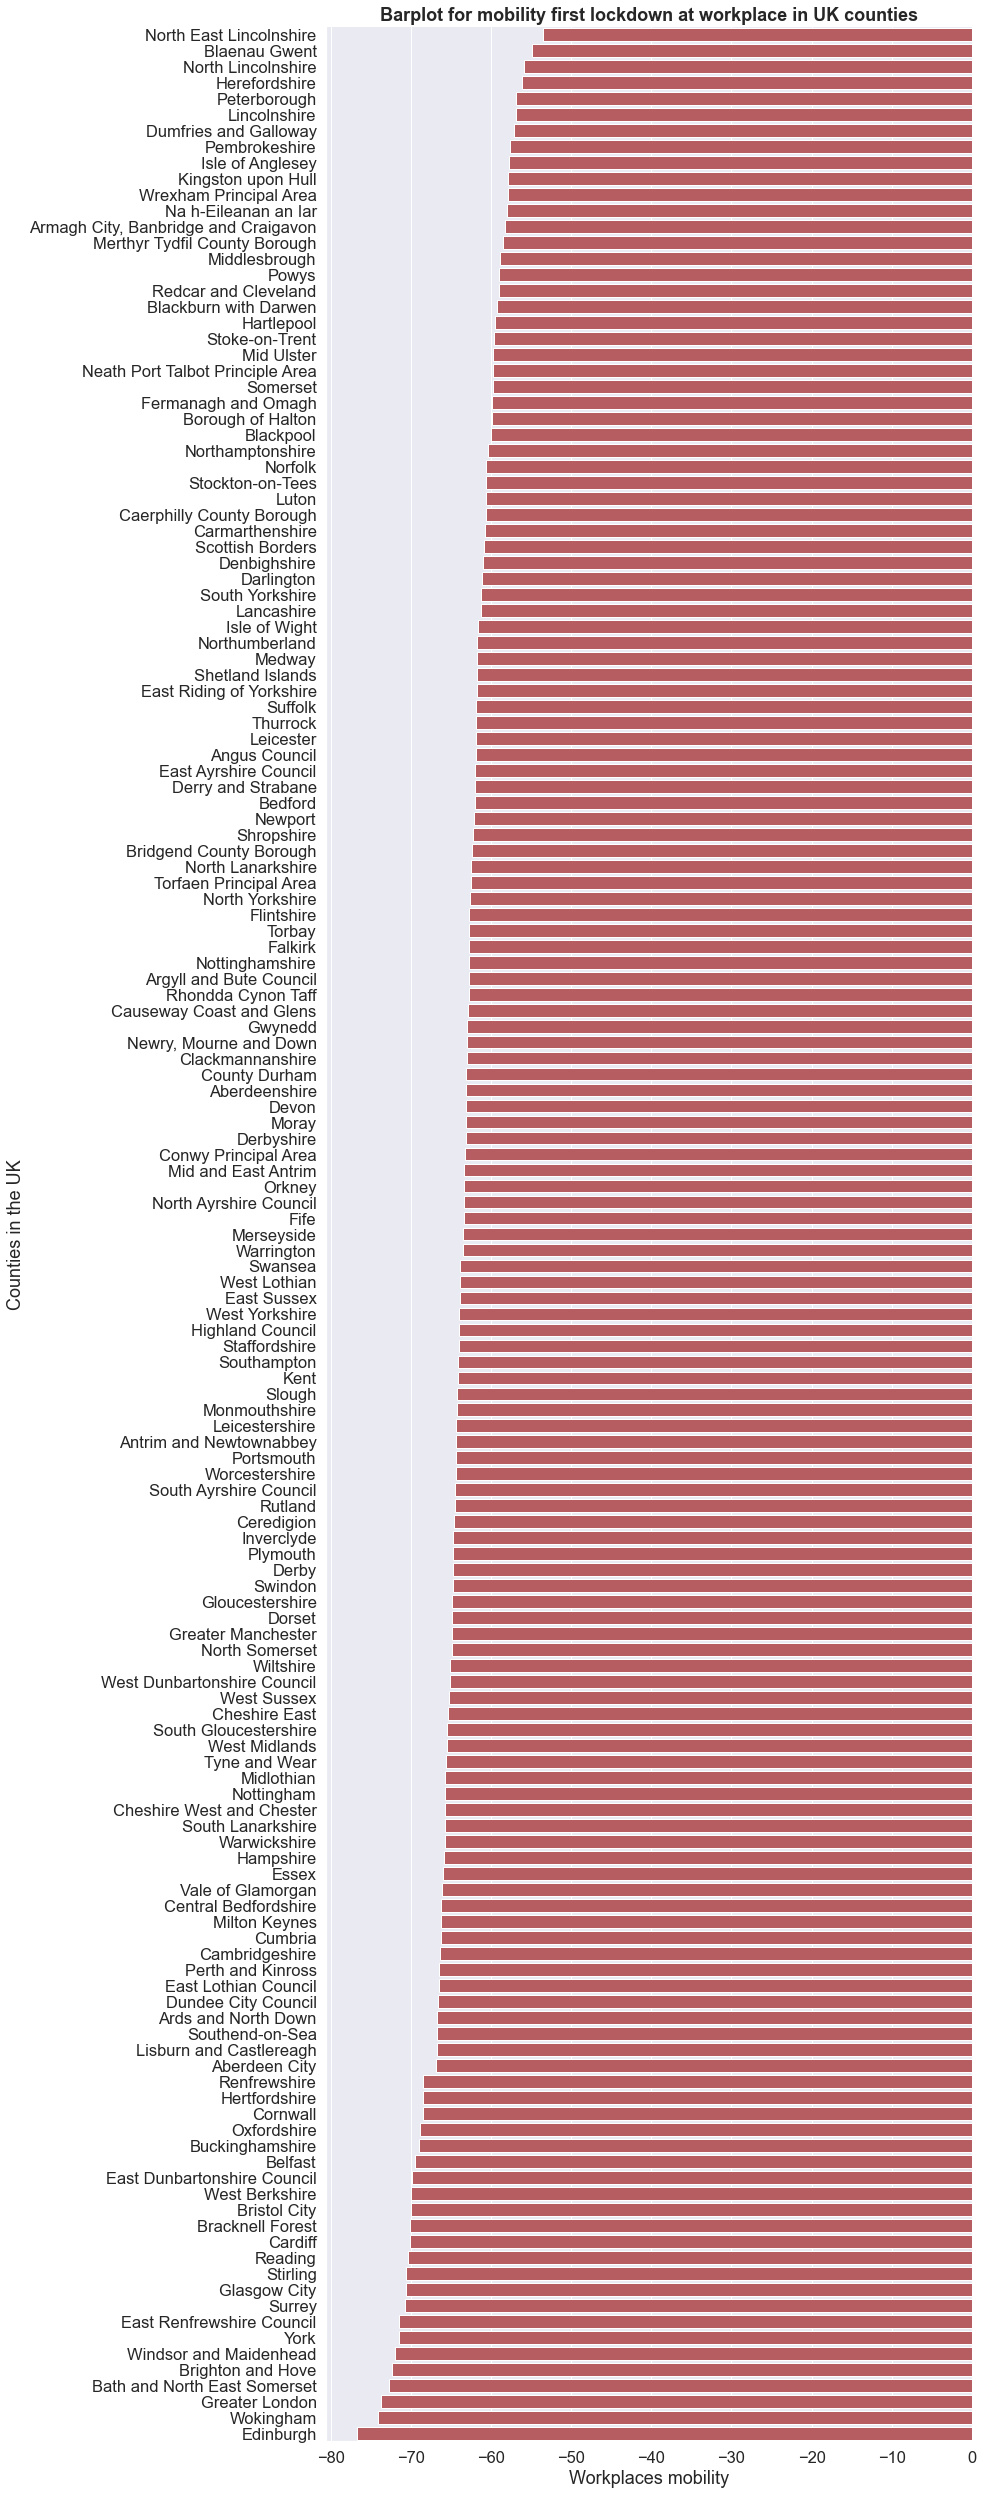

In [19]:
# Now we plot a bar graph of the 99% confidence intervals using 10,000 bootstrap for all the counties in UK sorted in and descending order from their max workplace mobility value.

ax1 = sns.catplot(x="mean",
                y="sub_region_1",
                col="variable", kind='bar',
                height=35, aspect=0.4,
                ci=99, n_boot=10000, capsize=.3,
                color="b",
                data=lockdown2_workplaces_mean);
ax2 = sns.catplot(x="mean",
                y="sub_region_1",
                col="variable", kind='bar',
                height=35, aspect=0.4,
                ci=99, n_boot=10000, capsize=.3,
                color="r",
                data=lockdown1_workplaces_mean);

ax1.set_titles("Barplot for mobility second lockdown at workplace in UK counties", fontweight = 'bold')
ax2.set_titles("Barplot for mobility first lockdown at workplace in UK counties", fontweight = 'bold')
ax1.set_axis_labels('Workplaces mobility', 'Counties in the UK')
ax2.set_axis_labels('Workplaces mobility', 'Counties in the UK')
ax1.tight_layout()
ax2.tight_layout()
#Store the fig for later publish
ax1.savefig("workplaces_barplot_UK_mobility.png")
ax2.savefig("workplaces_barplot_UK_mobility_firstlockdown.png")

#### __Analysis_Task 2.1__

The graphs above represent the mean mobility values at workplace during the first and second lockdown in different counties in UK. 

We can see that during the first lockdown the mobility was considerably lower that during the second lockdown. During the first lockdown the lowest mobility was in the county of Edinburgh with approximately a mean of -78 from their normal; For the second lockdown the lowest mobility was in Greater London with approximately a mean of -46 from their normal.

The counties with the lowest mean mobility in descendent order were:

|First Lockdown|Second Lockdown|
|--------------|---------------|
|Edinburgh|Greater London|
|Wokingham|Bath and North East Somerset|
|Greater London|York|
|Bath and North East Somerset|Wokingham|
|Brighton and Hove|Windsor and Maidenhead|

We can see how in the first lockdown the most populate counties reduce their mobility drastically, however during the second lockdown the only repeating counties  are `Greater London` and `Bath and North East Somerset`.

---

In [25]:
#Here we store the median value of all counties in UK across all mobility trends.
MobilityTrends_UK_stats_median = mobility_trends_UK.groupby('sub_region_1')[["retail_and_recreation_percent_change_from_baseline",
                                                                      "grocery_and_pharmacy_percent_change_from_baseline",
                                                                      "parks_percent_change_from_baseline",
                                                                      "transit_stations_percent_change_from_baseline",
                                                                      "workplaces_percent_change_from_baseline",
                                                                      "residential_percent_change_from_baseline"]].median()
MobilityTrends_UK_stats_median.head()

,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
sub_region_1,,,,,,
Aberdeen City,-36.0,-2.0,11.0,-39.0,-40.0,11.5
Aberdeenshire,-11.0,-5.0,21.0,-38.0,-34.0,9.0
Angus Council,-9.0,-1.0,14.0,-28.0,-27.0,8.0
Antrim and Newtownabbey,-15.0,-2.0,-31.0,-44.0,-29.0,10.0
Ards and North Down,-13.0,8.0,6.0,-41.0,-32.0,10.0


In [24]:
MobilityTrends_UK_stats_median.shape

(151, 6)

In [26]:
MobilityTrends_UK_stats_median_NoNa = MobilityTrends_UK_stats_median[["retail_and_recreation_percent_change_from_baseline",'workplaces_percent_change_from_baseline']].dropna()
MobilityTrends_UK_stats_median_NoNa.shape

(151, 2)

In [29]:
# Fit a linear regression model and store results
from scipy import stats

slope, intercept, r_value, p_value, std_err = stats.linregress(MobilityTrends_UK_stats_median_NoNa["retail_and_recreation_percent_change_from_baseline"],MobilityTrends_UK_stats_median_NoNa["workplaces_percent_change_from_baseline"])
slope, intercept, r_value, p_value, std_err

(0.36193469429923797,
 -23.706642078602837,
 0.4620472159862573,
 2.3440780934994153e-09,
 0.056911954736726014)

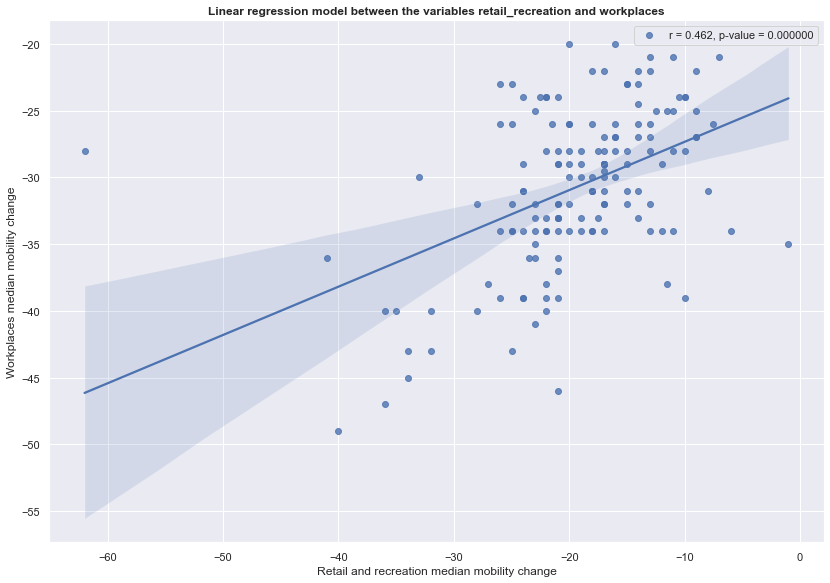

In [33]:
#Here we create a Linear regression model with the store results
sns.set(rc={'figure.figsize':(11.7,8.27)})
fig = sns.regplot(x = "retail_and_recreation_percent_change_from_baseline",
                y = "workplaces_percent_change_from_baseline",
                label="r = {0:.3f}, p-value = {1:3f}".format(r_value, p_value),
                data = MobilityTrends_UK_stats_median)
#Set the title and presentation
fig.set_title("Linear regression model between the variables retail_recreation and workplaces", fontweight = "bold")
fig.set(xlabel='Retail and recreation median mobility change', ylabel='Workplaces median mobility change')
fig.legend()
plt.tight_layout()
plt.savefig("Linear regression model between the variables retail_recreation and workplaces.png")

#### __Analysis_Task 2.2__

Independent Variable: Retail and recreation median mobility change

Dependent Variable: Workplaces median mobility change

R value = 0.462 / Meaning that we have a considerably positive correlation as the closes that R value of 1 means a perfect positive correlation.

P value = 0.000 / Meaning that the relationship is statiscally significant and we can reject the null hyphotesis.

In the Linear Regression model above we can see that there is positive correlaction between `Retail and recreation` and `Workplaces`  as for each increase in x, y tends to increase too. However, another interpretation could be that any time the mobility for retail and recreation increase we can see that the workplaces mobility also increase. 

So as people increase their mobility in retail and recreation we can see how also actives the mobility in workplaces.

---

## __Task 3__

How do mobility trends change over time in selected UK counties? For a sample of counties (Essex, Kent, York, Suffolk), perform the following computations: 
1. Create a dataframe containing all the data about the counties of interest.
2. Reshape the dataframe from wide to long data format.
3. Aggregate daily mobility trends to monthly mobility trends.
4. Plot the monthly mobility trends across all counties and all mobility categories using the `seaborn` function `relplot`. Plot also the 95% confidence intervals of the mean mobility trends. 

Give a brief interpretation of the results. Determine whether counties differ in their mobility trends and whether those differences are statistically significant based on the 95% confidence intervals (CI).

_Level of analysis:_ UK county

_Variables:_ all six mobility categories

_Descriptive statistics:_ mean and 95% CI using `relplot` (no need to compute the mean and 95% CI separately, just interpret the ones you got from the plot you created) 

_Plotting:_ `relplot`


In [34]:
# Insert your code about Taks 3 here. Add both Code cells and Text cells as needed.
#Here we create a new column that will only generate month and year by using strftime
mobility_trends_UK_long["Month-Year"] = mobility_trends_UK_long['date'].dt.strftime('%b-%Y')

#We select our 4 counties in UK
MobilityTrends_UK_Essex = mobility_trends_UK_long[mobility_trends_UK_long["sub_region_1"] == "Essex"]

MobilityTrends_UK_Kent = mobility_trends_UK_long[mobility_trends_UK_long["sub_region_1"] == "Kent"]

MobilityTrends_UK_York = mobility_trends_UK_long[mobility_trends_UK_long["sub_region_1"] == "York"]

MobilityTrends_UK_Suffolk = mobility_trends_UK_long[mobility_trends_UK_long["sub_region_1"] == "Suffolk"]

In [36]:
#Combine all the counties into one.
MobilityTrends_UK_Four_counties = pd.concat([MobilityTrends_UK_Essex, 
                                             MobilityTrends_UK_Kent, 
                                             MobilityTrends_UK_York,
                                             MobilityTrends_UK_Suffolk])
MobilityTrends_UK_Four_counties

,country_region,sub_region_1,date,variable,value,Month-Year
65069,United Kingdom,Essex,2020-02-15,retail_and_recreation_percent_change_from_base...,-9.0,Feb-2020
65070,United Kingdom,Essex,2020-02-16,retail_and_recreation_percent_change_from_base...,-16.0,Feb-2020
65071,United Kingdom,Essex,2020-02-17,retail_and_recreation_percent_change_from_base...,9.0,Feb-2020
65072,United Kingdom,Essex,2020-02-18,retail_and_recreation_percent_change_from_base...,10.0,Feb-2020
65073,United Kingdom,Essex,2020-02-19,retail_and_recreation_percent_change_from_base...,9.0,Feb-2020
...,...,...,...,...,...,...
1788542,United Kingdom,Suffolk,2022-02-14,residential_percent_change_from_baseline,7.0,Feb-2022
1788543,United Kingdom,Suffolk,2022-02-15,residential_percent_change_from_baseline,8.0,Feb-2022
1788544,United Kingdom,Suffolk,2022-02-16,residential_percent_change_from_baseline,7.0,Feb-2022
1788545,United Kingdom,Suffolk,2022-02-17,residential_percent_change_from_baseline,6.0,Feb-2022


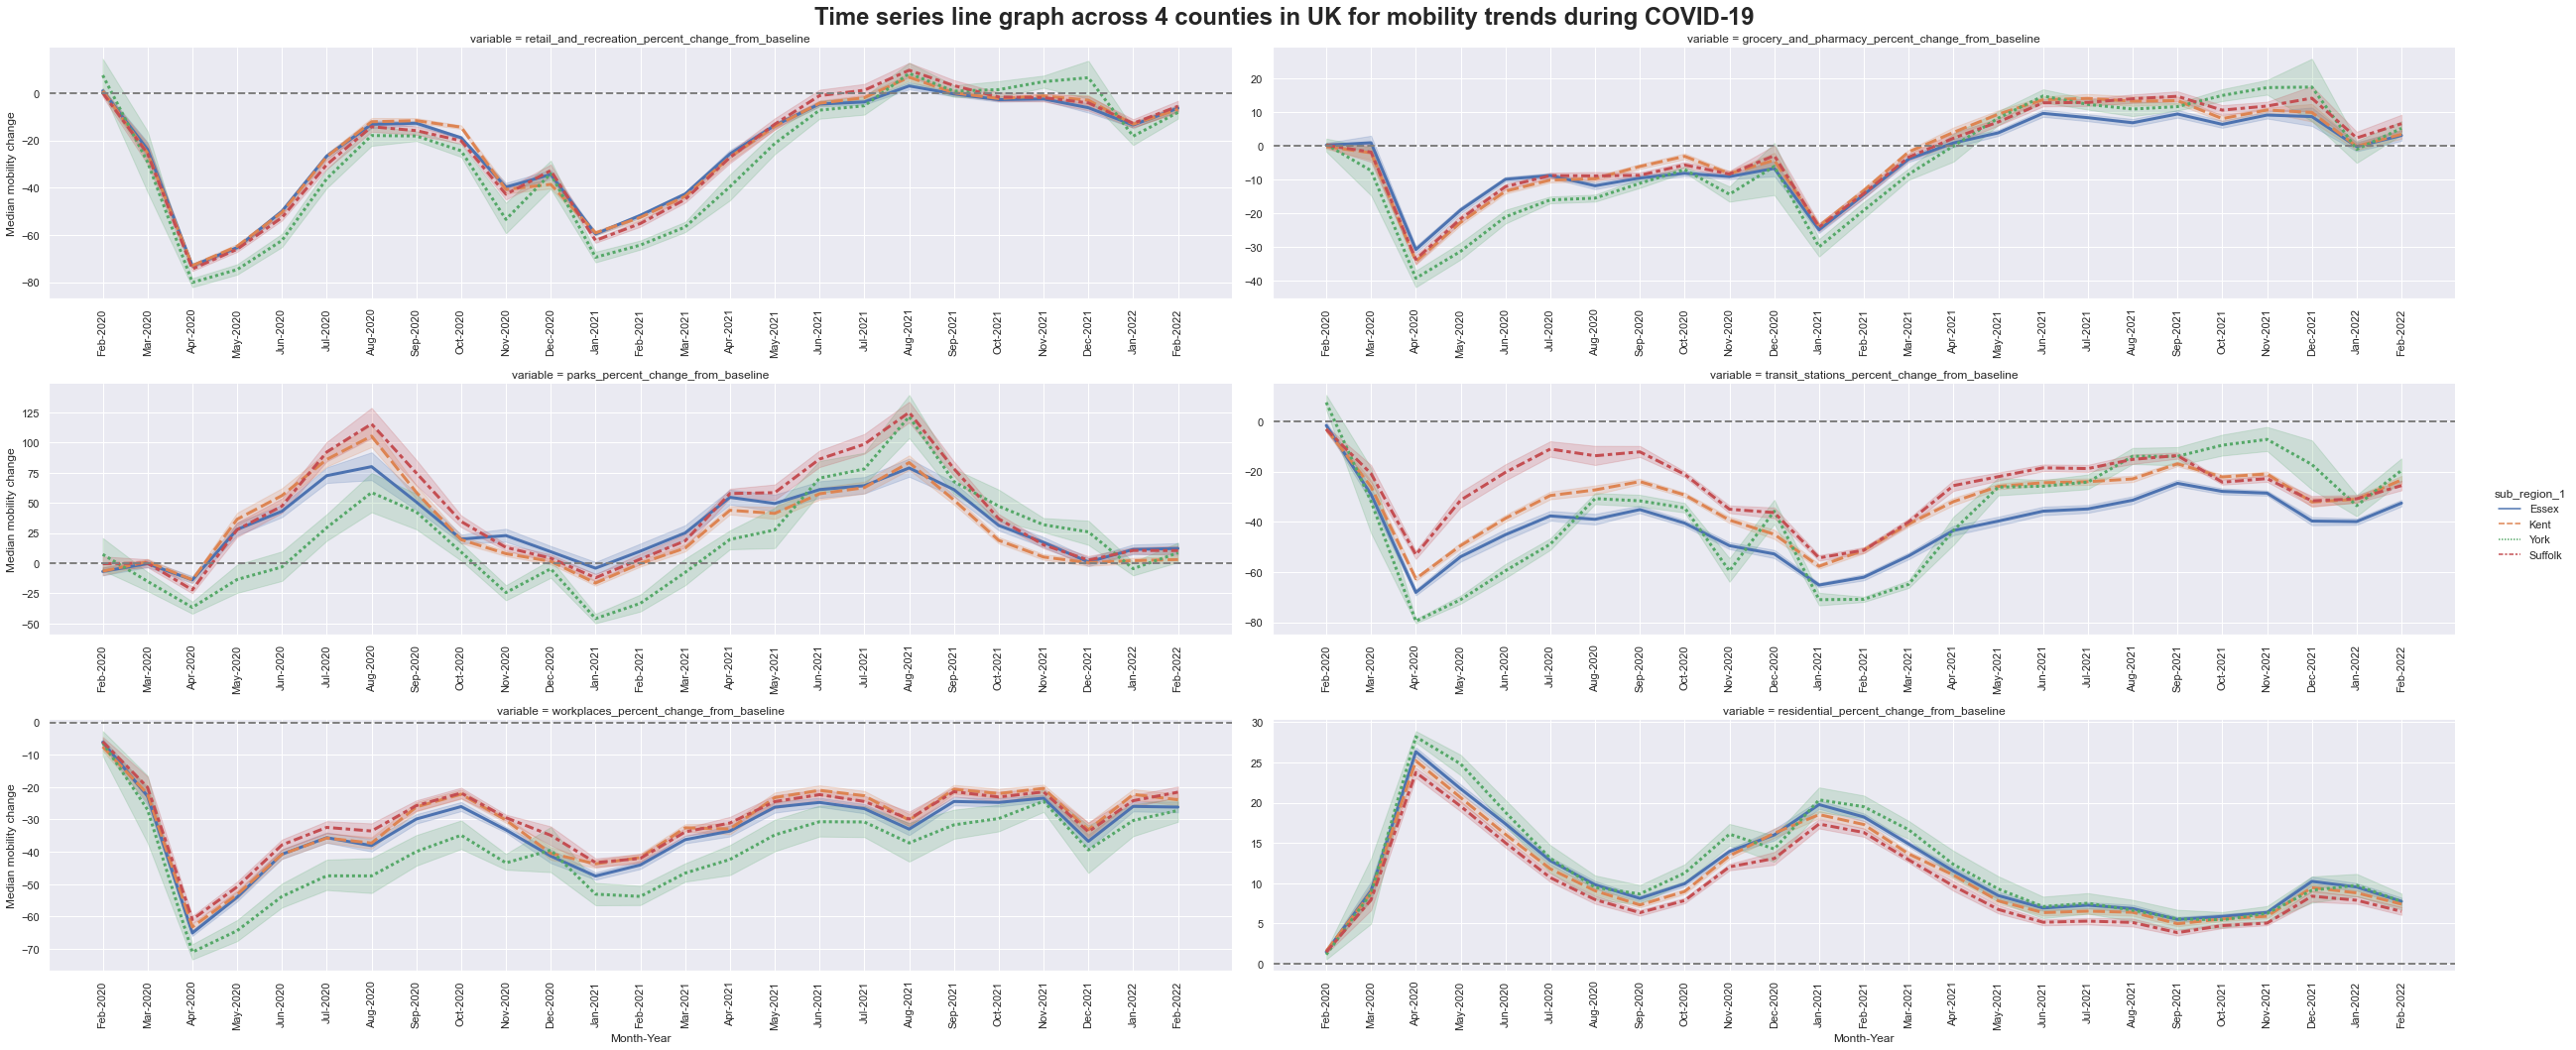

In [37]:
# Figures to represent the relationshhip between Month-Year and their value for each mobility trends.
fig = sns.relplot(x="Month-Year",
                y="value",
                hue="sub_region_1",
                style="sub_region_1",
                col="variable", col_wrap=2,#Divide the graphs into two columns
                height=5, aspect=3.5, 
                linewidth=3, ci=95,#set CI to 95
                n_boot = 1000, #Number of resamples to iterate
                seed=13, #Unique seed por replicability
                facet_kws={'sharey': False, 'sharex': False},
                kind="line",
                data=MobilityTrends_UK_Four_counties)

# Draw a horizontal line at 0 
for ax in fig.axes.flat:
    ax.axhline(color='gray',linestyle='--',lw=2)

#Set the head title and presentation
fig.fig.suptitle("Time series line graph across 4 counties in UK for mobility trends during COVID-19", fontsize=24, fontweight = 'bold')
fig.fig.subplots_adjust(top=1)
fig.set_ylabels("Median mobility change")
fig.set_xticklabels(rotation = 'vertical')
fig.tight_layout()
plt.savefig("Line graph across time for 4 counties in UK for mobility trends during COVID-19.png")

### __Analysis_Task 3__

In order to interpretate the results for the 4 counties Essex, Kent, York and Suffol I will divide them by their mobility trends:

Key date: March and Apr 2020 1st Lockdown

__Retail and recreation__: In this graph we can see that the 4 counties from Feb-2020 drop radically their mobility from their baseline. Starting to rise the mobility in the month of Apr to until Aug 2020. We can see that by Jan 2021 the mobility reach a new low and then keep improving until the month of Aug 2021. Is important to highly that the county of `York` since to be the one with the lowest mobility among all of them.

__Grocery and pharmacy__: In this graph we can see that the 4 counties drop their mobility by the month of Apr 2020 and later at is not recover until the next year by Apr 2021 when the mobility in fact increase 10 points higher than their baseline mobility trend.

__Parks__: In this graph we can see a variation in mobility across the 4 counties with `Suffolk` increasing their mobility in parks by the Apr 2020 and Apr 2021. Followed by `York` who started with low mobility in the Apr 2020 but by Apr 2021 in reach the same increase as in `Suffolk`.

__Transit station__: In this graph we can see how the 4 counties reduce mobility reaching by Apr 2020 their lowest with `Kent` and `Essex` reducing the most their mobility. Later, we see that each county starts to increase their mobility however they since to drop their mobility by Nov 2020 and later increase in small points their mobility. Although the 4 counties fluctuate in their mobility they clearly managed to maintained lower that their baseline.

__Workplace__: In this graph we can see the 4 counties drastically reduce their mobility by -70 points by Apr 2020 with `York` being constantly with a lower mobility that the rest. From there we see a small recover of the mobility until Feb 2022 reaching -30 points in mobility. 

__Residential__: In this graph we can see the opposite that in the workplaces where the increase in mobility reach a +30 points by the month of Apr 2020 and from there slighlty reducing until the month of Sep and Oct 2020 when start to rise against for the 4 counties with `York` being the county with slighly more residential mobility than the rest. 

In conclusion, the mobility trend of the 4 counties fluctuates in key dates for example during the first lockdown (March-Apr 2020) and also during special dates like the summer months we see more mobility across parks. Overall, the county of `York` since to be most statiscally significant as their 95 CI is higher than 0 (could also means that is necessary more samples) and also have the most drastic changes in mobility in comparison with the other 4 counties. Lastly, the county with the lowest 95 CI will be the county of `Kent`.

---

### __References__

**[Reproducible Data Science with Open-Source Python Tools and Real-World Data](https://valdanchev.github.io/reproducible-data-science-python)**